In [25]:
# Подключаем необходимые для анализа библиотеки
from IPython.display import display
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
import math as ms
import numpy as np

In [26]:
def normal_plot(df, array):
    voters = array
    x = voters
    
    source = {"Index": ["ind"]*len(x), "voters" : x} # Индексируем сырой массив из кол-ва избирателей представленной выборки

    df = pd.DataFrame(source)

    df_mean = np.mean(df["voters"])
    print('\nСреднее значение данной выборки = ', df_mean)
    
    df_std = np.std(df["voters"])
    print('\nНормальное отклонение  данной выборки = ', df_std)
    
    # Расчёт Probability Density Function/Функция плотности вероятности (array, mu, sigma)
    # Применяется на сортированный массив
    pdf = norm.pdf(df["voters"].sort_values(), df_mean, df_std)
    
    plt.plot(df["voters"].sort_values(), pdf)
    plt.xlim([-1200,4000])  
    plt.xlabel("Кол-во избирателей", size=16)    
    plt.ylabel("Частота", size=16)                
    plt.grid(True, alpha=0.3, linestyle="--")
    plt.show()

In [8]:
# Формируем DataFrame

path ="~/Downloads/russia.ods"
raw_df = pd.read_excel(path, engine = 'odf')
raw_df[['tik', 'Число избирателей, внесенных в список избирателей на момент окончания голосования']]

,tik,"Число избирателей, внесенных в список избирателей на момент окончания голосования"
0,Алтайская,385
1,Алтайская,1515
2,Алтайская,1175
3,Алтайская,2257
4,Алтайская,1924
...,...,...
96320,Нахимовская,2286
96321,Нахимовская,1589
96322,Нахимовская,1333
96323,Нахимовская,1235


In [27]:
raw_df

,reg,oik,tik,uik,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно","Число избирательных бюллетеней, выданных в помещении для голосования в день голосования",,Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении"
0,Алтайский край,ОИК №39,Алтайская,УИК №592,385,380,0,140,38,202,38,140,4,174,0,0
1,Алтайский край,ОИК №39,Алтайская,УИК №593,1515,1500,0,488,81,931,81,488,11,558,0,0
2,Алтайский край,ОИК №39,Алтайская,УИК №594,1175,1150,0,387,77,686,77,387,7,457,0,0
3,Алтайский край,ОИК №39,Алтайская,УИК №595,2257,2230,0,872,90,1268,90,872,23,939,0,0
4,Алтайский край,ОИК №39,Алтайская,УИК №596,1924,1900,0,657,186,1057,186,657,17,826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96320,город Севастополь,ОИК №219,Нахимовская,УИК №187,2286,1800,0,715,871,214,871,715,45,1541,0,0
96321,город Севастополь,ОИК №219,Нахимовская,УИК №188,1589,1100,0,584,321,195,321,584,14,891,0,0
96322,город Севастополь,ОИК №219,Нахимовская,УИК №189,1333,800,0,432,202,166,202,432,20,614,0,0
96323,город Севастополь,ОИК №219,Нахимовская,УИК №190,1235,900,0,459,201,240,201,459,15,645,0,0


In [28]:
# Формируем отдельный DataFrame только с кол-вом избирателей для расчётов

raw_voters = raw_df['Число избирателей, внесенных в список избирателей на момент окончания голосования']
print(raw_voters)


0         385
1        1515
2        1175
3        2257
4        1924
         ... 
96320    2286
96321    1589
96322    1333
96323    1235
96324     992
Name: Число избирателей, внесенных в список избирателей на момент окончания голосования, Length: 96325, dtype: int64


In [29]:
# Считаем объем выборки по формуле

N=int((1.95**2*0.5*0.5)/0.04**2)
print('Объем выборки N =',N)

Объем выборки N = 594


In [30]:
# Проводим необходимые для выборок и анализа расчёты 

n = len(raw_voters)        # Кол-во избирателей
mean = (sum(raw_voters)/n) # Мат.ожидание по количеству избирателей
print('Количество избирателей = ', n)
print('Математическое ожидание = ', mean)

shifted_dispersion = sum((i-mean)**2 for i in raw_voters)/n
print('Дисперсия смещённая = ', shifted_dispersion)

dispersion = n*shifted_dispersion/(n-1) # Не смещённая дисперсия

sigma = ms.sqrt(dispersion) # Среднеквадратичное отклонение
print('Sigma = ', sigma)
triple_sigma = sigma*3
print('x3 Sigma = ', triple_sigma)


Количество избирателей =  96325
Математическое ожидание =  1133.7104801453413
Дисперсия смещённая =  3664191.336474116
Sigma =  1914.2176931446295
x3 Sigma =  5742.653079433889


In [31]:
df_array = np.array(raw_voters) # Переводим сырой DataFrame избирателей в массив

standart_deviation = np.std(df_array) # Стандартное отклонение


In [32]:
# Чистим генеральную выборку через x3 Sigma

elements = np.array(raw_voters)
print(elements)
mean = np.mean(elements, axis=0) # Среднее по массиву избирателей
std = np.std(elements, axis=0) # Standart Deviation / Нормальное отклонение

data =np.array(raw_voters)

df = pd.DataFrame({
                'raw_voters': raw_df['Число избирателей, внесенных в список избирателей на момент окончания голосования'].tolist(),
                'reg': raw_df['reg'].tolist(),
                'tik': raw_df['tik'].tolist(),
                'valid_ballots': raw_df['Число действительных избирательных бюллетеней'].tolist(),
                'invalid_ballots': raw_df['Число недействительных избирательных бюллетеней'].tolist()}
                  )
triple_sigma_left= df['raw_voters'].mean() - 3 * sigma
print ('Левая х3 Sigma =',triple_sigma_left)


triple_sigma_right= df['raw_voters'].mean() + 3 * sigma
print ('Правая x3 Sigma = ',triple_sigma_right)


df=df.loc[(df['raw_voters'] >mean-3 * sigma) & (df['raw_voters'] <mean+3 * sigma)]

probability = len(df)/(len(raw_df)/100)
print('\nВероятность того, что значение нормально распределённой случайной величины лежит в указанном интервале= ', probability,'%\n' )

display(df)

[ 385 1515 1175 ... 1333 1235  992]
Левая х3 Sigma = -4608.942599288547
Правая x3 Sigma =  6876.36355957923

Вероятность того, что значение нормально распределённой случайной величины лежит в указанном интервале=  99.96366467687517 %



,raw_voters,reg,tik,valid_ballots,invalid_ballots
0,385,Алтайский край,Алтайская,174,4
1,1515,Алтайский край,Алтайская,558,11
2,1175,Алтайский край,Алтайская,457,7
3,2257,Алтайский край,Алтайская,939,23
4,1924,Алтайский край,Алтайская,826,17
...,...,...,...,...,...
96320,2286,город Севастополь,Нахимовская,1541,45
96321,1589,город Севастополь,Нахимовская,891,14
96322,1333,город Севастополь,Нахимовская,614,20
96323,1235,город Севастополь,Нахимовская,645,15


In [33]:
df=df.reset_index()
df['population'] = df.groupby('tik', sort=False)["raw_voters"].transform('sum')
df

,index,raw_voters,reg,tik,valid_ballots,invalid_ballots,population
0,0,385,Алтайский край,Алтайская,174,4,37078
1,1,1515,Алтайский край,Алтайская,558,11,37078
2,2,1175,Алтайский край,Алтайская,457,7,37078
3,3,2257,Алтайский край,Алтайская,939,23,37078
4,4,1924,Алтайский край,Алтайская,826,17,37078
...,...,...,...,...,...,...,...
96285,96320,2286,город Севастополь,Нахимовская,1541,45,83820
96286,96321,1589,город Севастополь,Нахимовская,891,14,83820
96287,96322,1333,город Севастополь,Нахимовская,614,20,83820
96288,96323,1235,город Севастополь,Нахимовская,645,15,83820


In [34]:
print("Минимальное количество проголосовавших в области =", min(df.population.unique()))
print("Максимальное количество проголосовавших в области =", max(df.population.unique()))

population_group=[0,500,2000,5000,50000,150000,500000]

df_population = []

for i in range(len(df)):
    j=0
    while (j<len(population_group)):
        if(df['population'][i]<=population_group[j]):
            df_population.append(j)
            break
        else:
            j+=1
            
df['population_group'] = df_population

display(df)

Минимальное количество проголосовавших в области = 64
Максимальное количество проголосовавших в области = 372068


,index,raw_voters,reg,tik,valid_ballots,invalid_ballots,population,population_group
0,0,385,Алтайский край,Алтайская,174,4,37078,4
1,1,1515,Алтайский край,Алтайская,558,11,37078,4
2,2,1175,Алтайский край,Алтайская,457,7,37078,4
3,3,2257,Алтайский край,Алтайская,939,23,37078,4
4,4,1924,Алтайский край,Алтайская,826,17,37078,4
...,...,...,...,...,...,...,...,...
96285,96320,2286,город Севастополь,Нахимовская,1541,45,83820,5
96286,96321,1589,город Севастополь,Нахимовская,891,14,83820,5
96287,96322,1333,город Севастополь,Нахимовская,614,20,83820,5
96288,96323,1235,город Севастополь,Нахимовская,645,15,83820,5


In [17]:
reg_names = df.reg.unique()
reg_names


array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская

In [18]:
for i in range(len(reg_names)):
    print('Регион:', reg_names[i])
    print('Кол-во избирателей в регионе:',df.loc[df['reg'] == reg_names[i], 'raw_voters'].sum())
    print('Кол-во валидных бюллетеней в регионе:',df.loc[df['reg'] == reg_names[i], 'valid_ballots'].sum())
    print('Кол-во недействительных бюллетеней в регионе:',df.loc[df['reg'] == reg_names[i], 'invalid_ballots'].sum())
    print('Общее кол-во задействованных бюллетеней в регионе:',df.loc[df['reg'] == reg_names[i], 'invalid_ballots'].sum() + df.loc[df['reg'] == reg_names[i], 'valid_ballots'].sum())
    print('\n')
    

Регион: Алтайский край
Кол-во избирателей в регионе: 1799561
Кол-во валидных бюллетеней в регионе: 713433
Кол-во недействительных бюллетеней в регионе: 18909
Общее кол-во задействованных бюллетеней в регионе: 732342


Регион: Амурская область
Кол-во избирателей в регионе: 612971
Кол-во валидных бюллетеней в регионе: 245872
Кол-во недействительных бюллетеней в регионе: 8786
Общее кол-во задействованных бюллетеней в регионе: 254658


Регион: Архангельская область
Кол-во избирателей в регионе: 877875
Кол-во валидных бюллетеней в регионе: 355393
Кол-во недействительных бюллетеней в регионе: 9386
Общее кол-во задействованных бюллетеней в регионе: 364779


Регион: Астраханская область
Кол-во избирателей в регионе: 725572
Кол-во валидных бюллетеней в регионе: 307608
Кол-во недействительных бюллетеней в регионе: 7850
Общее кол-во задействованных бюллетеней в регионе: 315458


Регион: Белгородская область
Кол-во избирателей в регионе: 1226298
Кол-во валидных бюллетеней в регионе: 712488
Кол-во 

Кол-во недействительных бюллетеней в регионе: 11643
Общее кол-во задействованных бюллетеней в регионе: 304858


Регион: Пензенская область
Кол-во избирателей в регионе: 1036556
Кол-во валидных бюллетеней в регионе: 588026
Кол-во недействительных бюллетеней в регионе: 7979
Общее кол-во задействованных бюллетеней в регионе: 596005


Регион: Пермский край
Кол-во избирателей в регионе: 1988878
Кол-во валидных бюллетеней в регионе: 737767
Кол-во недействительных бюллетеней в регионе: 36784
Общее кол-во задействованных бюллетеней в регионе: 774551


Регион: Приморский край
Кол-во избирателей в регионе: 1454733
Кол-во валидных бюллетеней в регионе: 594937
Кол-во недействительных бюллетеней в регионе: 23609
Общее кол-во задействованных бюллетеней в регионе: 618546


Регион: Псковская область
Кол-во избирателей в регионе: 518056
Кол-во валидных бюллетеней в регионе: 226329
Кол-во недействительных бюллетеней в регионе: 5263
Общее кол-во задействованных бюллетеней в регионе: 231592


Регион: Респ

Общее кол-во задействованных бюллетеней в регионе: 731968


Регион: Чувашская Республика - Чувашия
Кол-во избирателей в регионе: 911953
Кол-во валидных бюллетеней в регионе: 503843
Кол-во недействительных бюллетеней в регионе: 15897
Общее кол-во задействованных бюллетеней в регионе: 519740


Регион: Чукотский автономный округ
Кол-во избирателей в регионе: 30704
Кол-во валидных бюллетеней в регионе: 17813
Кол-во недействительных бюллетеней в регионе: 742
Общее кол-во задействованных бюллетеней в регионе: 18555


Регион: Ямало-Ненецкий автономный округ
Кол-во избирателей в регионе: 376862
Кол-во валидных бюллетеней в регионе: 249739
Кол-во недействительных бюллетеней в регионе: 3555
Общее кол-во задействованных бюллетеней в регионе: 253294


Регион: Ярославская область
Кол-во избирателей в регионе: 920024
Кол-во валидных бюллетеней в регионе: 346394
Кол-во недействительных бюллетеней в регионе: 6781
Общее кол-во задействованных бюллетеней в регионе: 353175


Регион: город Москва
Кол-во и


МЕХАНИЧЕСКАЯ ВЫБОРКА

Шаг выборки =  162 



,index,raw_voters,reg,tik,valid_ballots,invalid_ballots,population,population_group
0,0,385,Алтайский край,Алтайская,174,4,37078,4
162,162,988,Алтайский край,Бийская,377,15,26480,4
324,324,1044,Алтайский край,Смоленская,432,11,19181,4
486,486,81,Алтайский край,Чарышская,37,0,9141,4
648,648,404,Алтайский край,Егорьевская,168,1,9937,4
...,...,...,...,...,...,...,...,...
95580,95614,2419,город Санкт-Петербург,Территориальная избирательная комиссия №21,911,8,113570,5
95742,95776,2987,город Санкт-Петербург,Территориальная избирательная комиссия №62,946,33,41072,4
95904,95938,2753,город Санкт-Петербург,Территориальная избирательная комиссия №27,831,17,90854,5
96066,96100,2540,город Санкт-Петербург,Территориальная избирательная комиссия №59,933,12,70213,5



 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1147.1966386554623

Нормальное отклонение  данной выборки =  812.4359946277935


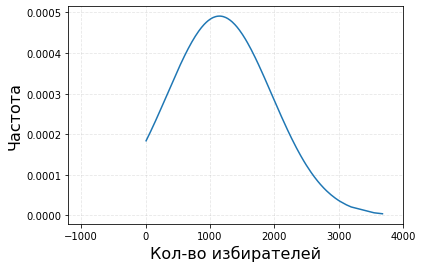

In [35]:

print("\nМЕХАНИЧЕСКАЯ ВЫБОРКА")

count = int(n/N) # Делим кол-во избирателей на объем выборки
print('\nШаг выборки = ', count, '\n')


mechanical_df = df.iloc[::count] # Создаем из генеральной выборки механическую, оставляя только каждый 162-ой элемент
display(mechanical_df)

mechanical_df.to_csv('mech_df.csv', index=False)

print('\n Мат.ожидание по генеральной выборке =', mean)

mech_voters = np.array(mechanical_df["raw_voters"])

normal_plot(mechanical_df, mech_voters)


СЛУЧАЙНАЯ ВЫБОРКА



,index,raw_voters,reg,tik,valid_ballots,invalid_ballots,population,population_group
93898,93931,1496,город Москва,район Чертаново Южное,496,12,67823,5
28928,28932,1672,Ленинградская область,Волховская,541,22,64120,5
88633,88650,1972,Чувашская Республика - Чувашия,"Чебоксары, Калининская",919,38,128769,5
21402,21404,2592,Краснодарский край,Динская,2364,16,108556,5
53510,53520,318,Республика Бурятия,Окинская,193,4,3861,3
...,...,...,...,...,...,...,...,...
60140,60150,801,Республика Саха (Якутия),Нерюнгринская,236,6,49279,4
69052,69069,1055,Самарская область,Жигулевская городская,373,11,45983,4
42604,42614,542,Оренбургская область,Матвеевская,332,0,9398,4
88879,88896,358,Чувашская Республика - Чувашия,Вурнарская,267,10,19681,4



 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1020.7575757575758

Нормальное отклонение  данной выборки =  777.7252151332474


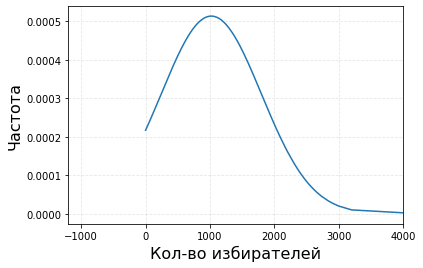

In [37]:
# Случайная выборка

print('\nСЛУЧАЙНАЯ ВЫБОРКА\n')

random_df=df.sample(N) # С помощью sample генерируем случайный DataFrame с размер выборки
display(random_df)

random_df.to_csv('random_df.csv', index=False)

print('\n Мат.ожидание по генеральной выборке =', mean)

random_voters = np.array(random_df["raw_voters"])
normal_plot(random_df, random_voters)


ТИПИЧЕСКАЯ ВЫБОРКА

Минимальное кол-во избирателей в выборке =  0
Максимальное кол-во избирателей в выборке =  96324
Кол-во выделенных групп =  17 



,index,raw_voters,reg,tik,valid_ballots,invalid_ballots,population,population_group,Группа
70148,70165,1001,Саратовская область,Балаковская,891,8,154813,6,1
46255,46265,2068,Пермский край,"Пермь, Индустриальная",610,23,118008,5,1
19468,19470,557,Кировская область,Белохолуницкая,296,6,14678,4,1
70838,70855,437,Саратовская область,Калининская,376,3,62359,5,1
14368,14369,582,Иркутская область,Иркутская - 94,358,6,56936,5,1
...,...,...,...,...,...,...,...,...,...
33680,33684,906,Московская область,Коломенская городская № 2,284,27,27552,4,1
11428,11429,510,Воронежская область,Павловская,429,0,205149,6,1
48049,48059,1236,Приморский край,Дальнереченская городская,491,35,21820,4,1
29096,29100,1066,Ленинградская область,Подпорожская,431,22,24144,4,1



 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1087.1902356902358

Нормальное отклонение  данной выборки =  807.2457449665568


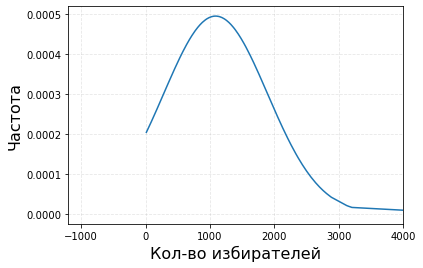

In [38]:
# Типическая выборка
print('\nТИПИЧЕСКАЯ ВЫБОРКА\n')

type_df = df.loc[~df['reg'].isin(["город Санкт-Петербург", "город Москва"])]

type_df = type_df.reset_index(drop=True)

min_value=type_df.min()[0]
max_value=type_df.max()[0]

print("Минимальное кол-во избирателей в выборке = ", min_value)
print("Максимальное кол-во избирателей в выборке = ", max_value)

# Считаем кол-во групп по формуле
group_N = int(1+3.322*ms.log10(n))
print("Кол-во выделенных групп = ", group_N,'\n')
group_border=(max_value-min_value)/group_N

# Присваем каждой строчке группу
raw_groups = []
groups_counter=[]

#Создаем семнадцать значение по которым кол-ва избирателей будут сортироваться по группам
for i in range(group_N+1):
    groups_counter.append(group_border*i)

#Сортировка по каждой строчке
for i in range(len(type_df)):
    j=0
    while (j<len(groups_counter)):
        if(type_df['raw_voters'][i]<=groups_counter[j]):
            raw_groups.append(j)
            break
        else:
            j+=1

# Добавляем к ещё сырой выборке столбец со значением группы для каждого кол-ва избирателей
type_df['Группа'] = raw_groups


# Механический сэмплинг из каждой группы
mechanical_sampling=type_df.groupby('Группа', group_keys=False).apply(lambda x: x.sample(frac=N/len(type_df)))

display(mechanical_sampling)

mechanical_sampling.to_csv('type_df.csv', index=False)

print('\n Мат.ожидание по генеральной выборке =', mean)

type_voters = np.array(mechanical_sampling["raw_voters"])
normal_plot(mechanical_sampling, type_voters)
